# Coursework #2 AI for Sustainable Development

## Coursework overview
Coursework #2 is a data analysis coding-based coursework. You are asked to choose a dataset related to sustainable development and do some machine learning based analysis. We will detail this more in the next sections.

You can choose an application/dataset from the ones we analysed in the first coursework or choose a completely new dataset: 
* **Option 1**: Choose a dataset from the SustainBench paper (which includes 15 datasets related to sustainable development). There is no restriction regarding the dataset, you can even choose the same dataset that you use in coursework #1. Please note that the authors from SustainBench have a GitHub project with data loaders, preprocessing code and baselines for these datasets here: https://github.com/sustainlab-group/sustainbench
* **Option 2**: Choose an alternative dataset of your choice (that you are interested in or that you plan on working on for your MSc dissertation). Please if you choose this option motivate the dataset's relationship to sustainable development. 

Once you have chosen your dataset we will ask you to do the following: 
1. Do some **exploratory data analysis** to get some insights about the dataset. We do not give specific guidelines here as this may depend on the dataset itself, but we ask you to justify your choices and the results of your analysis.
2. Think about the **task that the dataset is most suitable for** and discuss what would be the most **appropriate evaluation criteria** for such a machine learning task. For example, you may have a dataset where songs are labelled with different music genres. Perhaps the task for which the dataset is most suitable for is to build a multi label prediction model that can classify new songs, and the most appropriate evaluation metric could be the hamming loss (commonly used in multi label prediction, which could be used both as inspiration for a training objective for neural networks, or simply as the evaluation criteria for model selection and hyperparameter tuning). 
3. **Design and implement a machine learning system/pipeline**. This could be either supervised or unsupervised. 
4. **Design a set of experiments** and discuss how these fit with the questions that the dataset aims to address. Do a **performance & scalability analysis** of your model.
5. Discuss/analyse the **ethical implications**, in connection with your exploratory data analysis and model performance (e.g. do you appreciate any imbalances in the data or initial biases that can be problematic?).
6. Discuss **sustainable development relevance & impact**.

We ask your code to be in python, but beyond that we do not mind what packages you use. 

For grading, we will not check your code in depth (beyond perhaps checking that it's doing what you describe). Instead, our focus will be on grading the analysis you have done, how well it's motivated and justified, how insightful it was, how do you interpret the results in terms of impact and sustainable development, etc.

**Submission**: You do not have to submit your dataset and notebook to the coursework submission. Simply run the analysis in jupyter notebooks and then export the notebook as html or pdf. You can submit this html/pdf file in moodle. 

### Previous work (5%)

**Guidelines**: We first ask you to summarise what has been done before with this dataset. While this is not specifically necessary for the purpose of the coursework, it is important for us to mark the novelty of your analysis, specially since many of these datasets come with associated baselines in the GitHub link we shared before. While we encourage you to compare to what has been done before we will evaluate whether you explored new approaches. Please give us in this section a brief introduction to the dataset and to the previous models that were built before using the data (you do not need to go over all models that were proposed before, you can just focus on the one with the best performance). Tell us whether these models were publicly available, and if so where to find them. It is crucial that in the next sections you justify how your analysis differs from this previous work.

<span style='color:red'> **[To be completed by you]** </span>
 

The chosen dataset is about cardiovascular diseases (CVDs), which is one of the most major cause of death globally, and an estimate about 32% of all death worldwide in 2019 is bacause of it based on the report from World Health Organization (WHO) [1]. The original data was collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad during 2015 with medical records of 299 heart failure patients [2][3], and previous research had represented this dataset to 299 samples with 13 CVDs related features, which contain information about patients' clinical, body, and lifestyle [4]. The target of this dataset is to predict whether the patient would die or not based on serum creatinine and ejection fraction, and this is a binary classification problem in the field of machine learning.	 

Pervious work used several machine learning models for making the prediction, including KNN, Decision Trees, Random Forests, etc.. While all models they used are open source at Github [5], and the results are shown at the table below. From these results random forests has the best performance on MCC adn ROC-AUC, while decisoin tree has dominate F1 score and TP rate, and other models are not as good as these two tree-based models for overall performance, like SVM, KNN, and Naive Bayes. Therefore, Random Forests and Decesion Trees are choosen as the baseline models for this dataset.


In this notebook, I choose a better tree-based model for this dataset -- LightGBM (Light Gradient Boosting Machine), which is a framework for implementing the GBDT algorithm with histgram algorithms, and it supports high efficiency parallel training with faster training speed, lower memory consumption, better accuracy, and it also support to quickly process massive data by distributed [6].




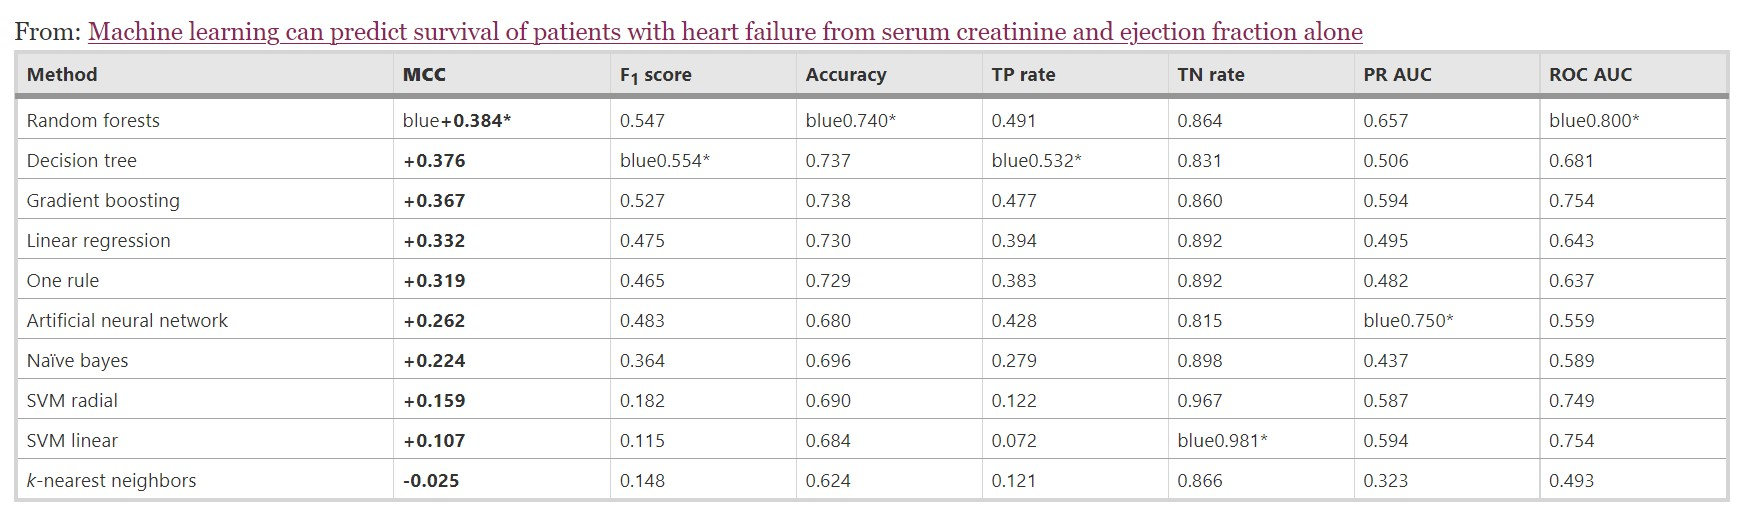

Reference for Previous Work part:

[1] World Health Organization. Global action plan for the prevention and control of noncommunicable diseases 2013-2020. World Health Organization, 2013.

[2] Ahmad, Tanvir, et al. "Survival analysis of heart failure patients: A case study." PloS one 12.7 (2017): e0181001.

[3] Ahmad T, Munir A, Bhatti SH, Aftab M, Ali Raza M. Survival analysis of heart failure patients: a case study. Dataset. https://plos.figshare.com/articles/Survival_analysis_of_heart_failure_patients_A_case_study/5227684/1. Accessed 25 Jan 2019.

[4] Chicco, Davide, and Giuseppe Jurman. "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone." BMC medical informatics and decision making 20.1 (2020): 1-16.

[5] Survival on patients having cardiovascular heart disease https://github.com/davidechicco/cardiovascular_heart_disease

[6] Ke, Guolin, et al. "Lightgbm: A highly efficient gradient boosting decision tree." Advances in neural information processing systems 30 (2017).

### Exploratory data analysis (15%)

**Guidelines**: Load the dataset and answer the following questions: 
* What are the characteristics of your dataset? Are there any trends in the data? (5%)
* Are there any challenges with the data? (missing values, outliers, imbalanced classes, biases, etc...) (5%)
* Does the data need any pre-processing to successfully apply standard machine learning models? If so, what kind? Please do the pre-processing that you consider necessary. (5%)

You can use descriptive statistics here, figures/plots, etc. 


In [ ]:
# your code here!
# load relevant packages, load your dataset, start your analysis
# you can have as many code cells as needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm.sklearn import LGBMClassifier
from sklearn import metrics
import missingno as msno


Read the dataset

In [ ]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

Check the size of dataset

In [ ]:
# check the size of dataset
df.shape

(299, 13)

Check the type for each features of the dataset

In [ ]:
# check the data types for each features
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Check the missing situation for dataset

In [ ]:
# check for missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

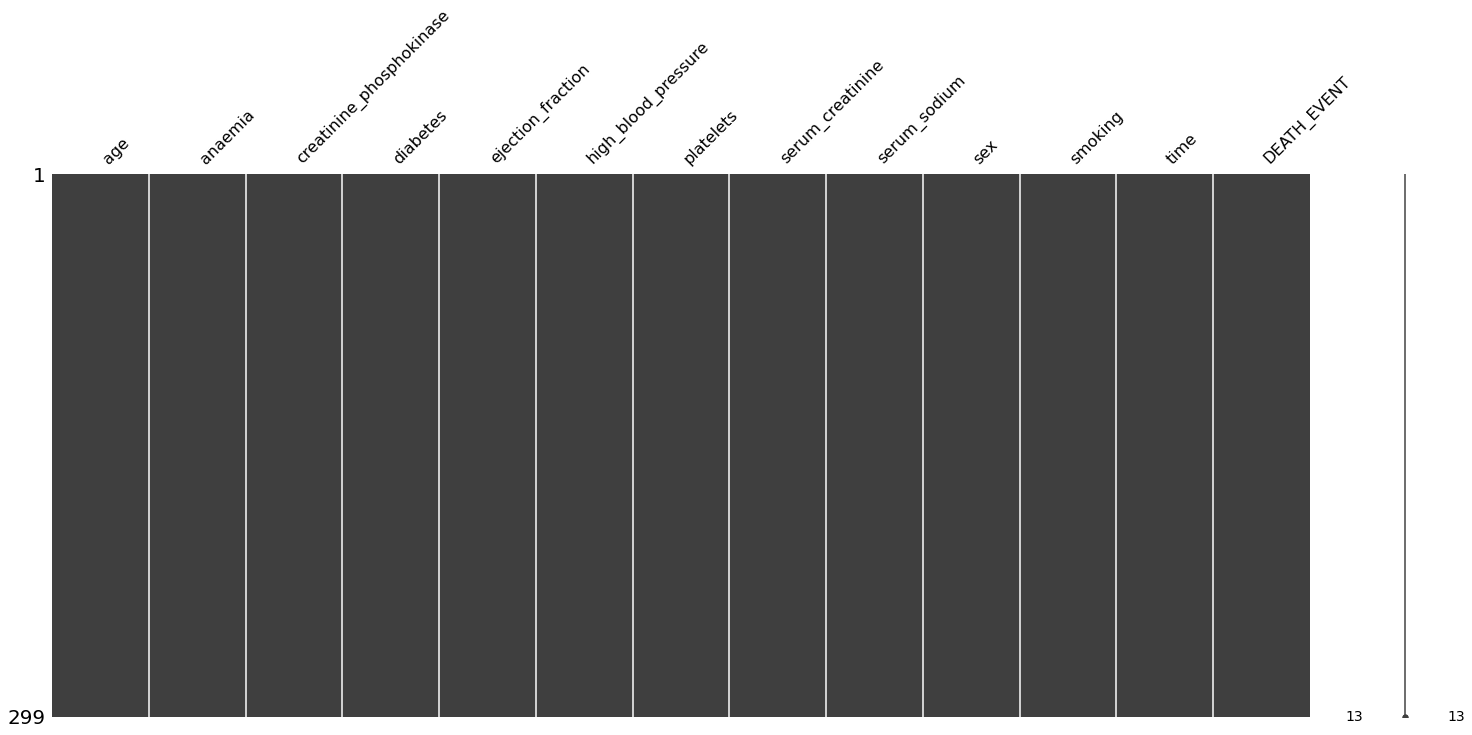

In [ ]:
# visualized the value's missing situation 
msno.matrix(df)

Check the dataset's size first 5 data

In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Check the description of the numerical part of the dataset

In [ ]:
df.describe()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Plot the distribution for each features

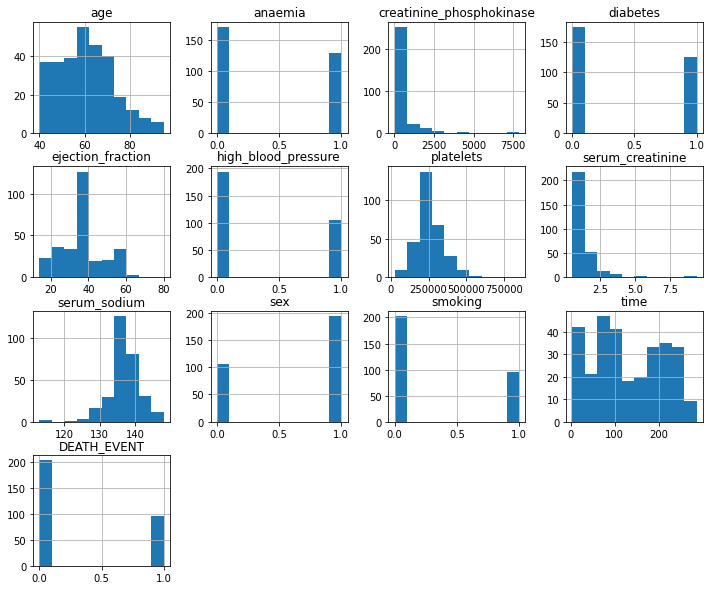

In [ ]:
df.hist(figsize=(12,10))
plt.show()

Check the imbalance rate for label

In [ ]:
df.DEATH_EVENT.mean()

0.3210702341137124

Chck the distribution of each feature accroding to the label

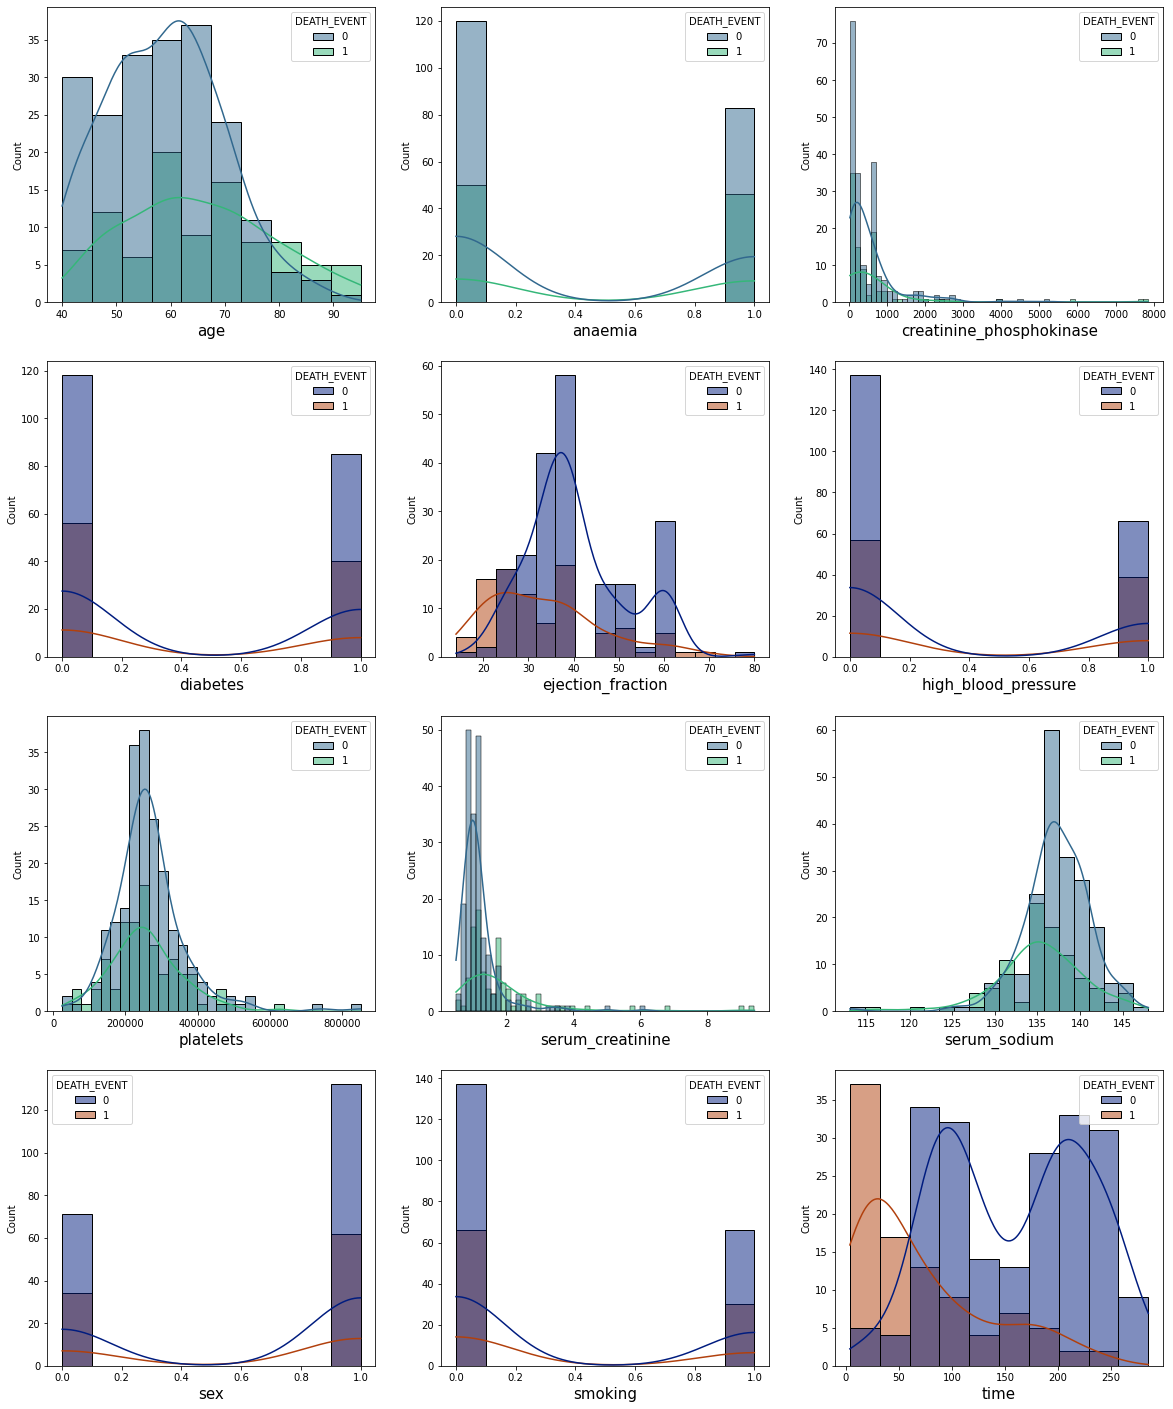

In [ ]:
fig, ax =plt.subplots(4,3, figsize=(20,25)) 
#plt.style.use("white")
#sns.set_style("white")


sns.histplot(x = df["age"], hue = df["DEATH_EVENT"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("age",fontsize=15)

sns.histplot(x = df["anaemia"], hue = df["DEATH_EVENT"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("anaemia",fontsize=15)

sns.histplot(x = df["creatinine_phosphokinase"], hue = df["DEATH_EVENT"], palette="viridis", kde=True, ax=ax[0,2]);
ax[0,2].set_xlabel("creatinine_phosphokinase",fontsize=15)

sns.histplot(x = df["diabetes"], hue = df["DEATH_EVENT"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("diabetes",fontsize=15)

sns.histplot(x = df["ejection_fraction"], hue = df["DEATH_EVENT"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ejection_fraction",fontsize=15)

sns.histplot(x = df["high_blood_pressure"], hue = df["DEATH_EVENT"], palette="dark", kde=True, ax=ax[1,2]);
ax[1,2].set_xlabel("high_blood_pressure",fontsize=15)

sns.histplot(x = df["platelets"], hue = df["DEATH_EVENT"], palette="viridis", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("platelets",fontsize=15)

sns.histplot(x = df["serum_creatinine"], hue = df["DEATH_EVENT"], palette="viridis", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("serum_creatinine",fontsize=15);

sns.histplot(x = df["serum_sodium"], hue = df["DEATH_EVENT"], palette="viridis", kde=True, ax=ax[2,2]);
ax[2,2].set_xlabel("serum_sodium",fontsize=15)

sns.histplot(x = df["sex"], hue = df["DEATH_EVENT"], palette="dark", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("sex",fontsize=15);

sns.histplot(x = df["smoking"], hue = df["DEATH_EVENT"], palette="dark", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("smoking",fontsize=15);

sns.histplot(x = df["time"], hue = df["DEATH_EVENT"], palette="dark", kde=True, ax=ax[3,2]);
ax[3,2].set_xlabel("time",fontsize=15);

Box plot for checking outliers

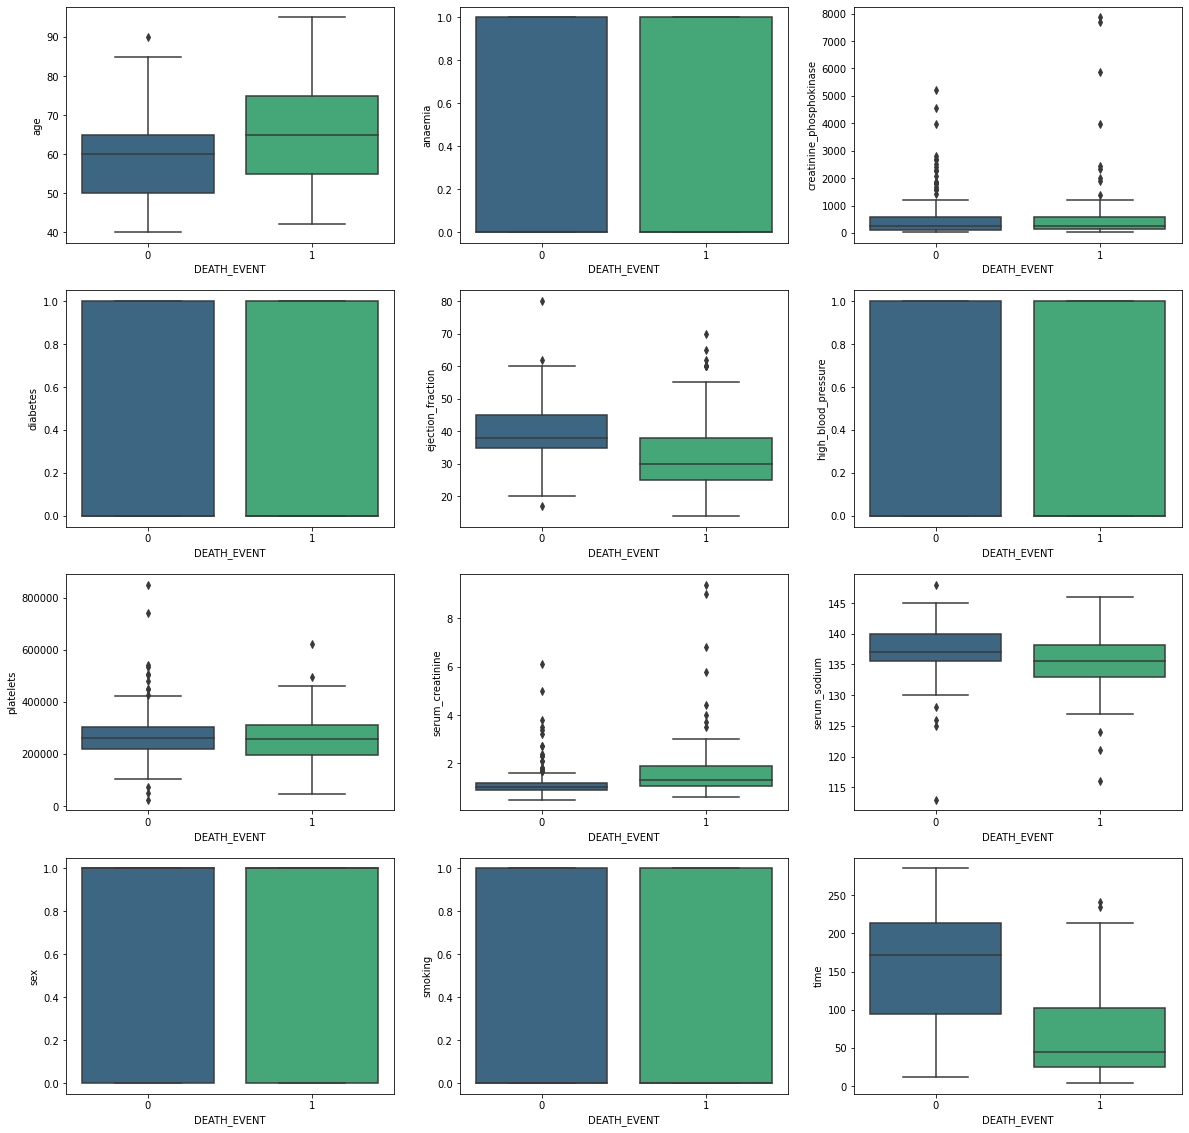

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df:
    if feature != "DEATH_EVENT" :
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='DEATH_EVENT', y=feature, data=df, palette="viridis")

Plot the correlcation between each features

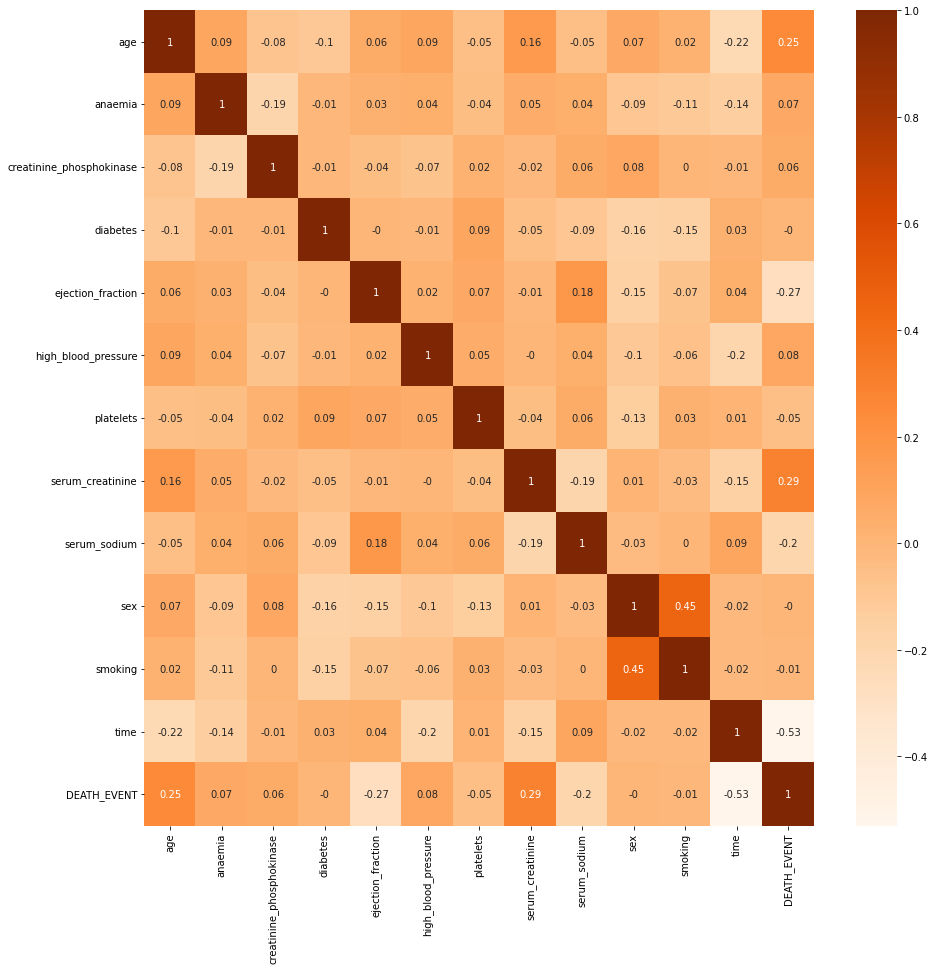

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(round(df.corr(),2), cmap='Oranges', annot=True)
plt.show()

Check if there exist multicolinearity, if exist, print the features 

In [ ]:
# ref: https://www.kaggle.com/code/azizozmen/heart-failure-predict-8-classification-techniques
df_temp = df.corr()
count = 0
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                count += 1
                print(f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")

print("\033[1mThe number of strong corelated features:\033[0m", count) 

The number of strong corelated features: 0


This dataset contains 299 samples of CVDs patients with 13 related featues:

- age: The age of patient                         
- anaemia: decrease of red blood cells or hemoglobin (1:yes, 0:no)                                   
- creatinine_phosphokinase: level of the CPK enzyme in the blood (mcg/L)      
- diabetes: If the patient has diabetes (1:yes, 0:no)                  
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)            
- high_blood_pressure: If the patient has hypertension (1:yes, 0:no)                  
- platelets: Platelets in the blood (kiloplatelets/mL)                   
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)          
- serum_sodium: Level of serum sodium in the blood (mEq/L)               
- sex: Sex of the patient                         
- smoking: Whether the patient is somking or not (1:yes, 0:no)                                      
- time: Follow-up period (days)	                      
- DEATH_EVENT: If the patient died during the follow-up period (1:yes, 0:no)                           	  

Since DEATH_EVENT is the target to predict, so this is a binary classifiation problem. Since the dataset has already processed that using label encoding to represent catagroical variables such as anaemia, diabetes, high_blood_pressure, and sex, therefore there's no further encoding needed for this dataset and every values from each features are either int or float. In addition, after checking, there isn't any missing value exist. 

After checking the distribution of each features, most of them are not normal distribution. However, as spliting data with their according label, some of features show the trend of normal distribution to its label. Also, it can be found that there is not a clear trend show the linear relationship between time and survival from the plot since the survival trend is not linear, and the pervious work also indicated this [1], as for month 5 has less surviving patients than month 4 and month 6. However, for overall trend, the dealth cases do decreasing as time gone, and it can be found that most of the dealth cases happend during first two or three months. It can be reasoned that since severe patients are relatively more likely to die, they can be tracked for less time than mild patients. And therefore, it might cause machine learning model overfit for the feature 'time'. 

The label DEATH_EVENT is found imbalance: 32.11% are positive and 67.89% are negative. Normally, there were two perspectives to solve the data imbalance: from data and from model [2]. Due to the character of the LightGBM, that this model is easy to adjust the weight automatically so that balance the dominated label when set the parameter 'is_unbalance' as True, so there's no need to make a change with data level [3]. By changing the objective function of the model, as increasing the weight of the positive sample so that the weight of the negative sample is
indirectly reduced, LightGBM offers the method to solve the problem of sample imbalance from the perspective of model instead of data. Another thing need to mention is about ethics, that the sample of men and women is also not balance, which would cause some questions in real world application, and this would be further discussed on Ethics part later. Also, since tree-based algorithms would not be affected when a monotonic transformation of any single features, so no data normalization need [4]. 

Box plot is applied to show the distribution of the comparison between the label DEATH_EVENT and each features of quantitative data. For the original numerical data, there do exist outliers, espeically for creatinine_phosphokinase, platelets and serum_creatinine. However, tree-based models are ronbust to outliers, They do not need to convert data or eliminate outliers in advance. They can fit complex nonlinear relationships and automatically deal with the interactions between predicted values [5]. Therefore, no further action needed for dealing outliers for this dataset when using LightGBM.


The correlation among every features are also been examined  using heatmap, only the correlation between time and DEATH_EVENT is larger than 0.5. However, researchers from pervious work didn't drop the time feature, but this project is going to test both dataset with time feature and without time feature. And after checking there isn't any multicolinearity exist for this dataset. So the hypothesis that each features are independent with each other can be made, and no further data multicolinearity elimination approach is needed for this dataset. 



Reference for EDA part:

[1] Chicco, Davide, and Giuseppe Jurman. "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone." BMC medical informatics and decision making 20.1 (2020): 1-16.

[2] Xiaolong, X. U., C. H. E. N. Wen, and S. U. N. Yanfei. "Over-sampling algorithm for imbalanced data classification." Journal of Systems Engineering and Electronics 30.6 (2019): 1182-1191.

[3] Parameters https://lightgbm.readthedocs.io/en/latest/Parameters.html#is_unbalance

[4] Wu, Xindong, et al. "Top 10 algorithms in data mining." Knowledge and information systems 14.1 (2008): 1-37.

[5] Elith, Jane, John R. Leathwick, and Trevor Hastie. "A working guide to boosted regression trees." Journal of animal ecology 77.4 (2008): 802-813.

### Task and evaluation (10%)

**Guidelines**: Tell us a bit about the main task that in your view this dataset could help solve and propose and justify the evaluation criteria that would be important here, not only considering the task but your exploratory data analysis. For example, if you found that there is class imbalance in the dataset and that the most important class is the minority one, you may want to add costs in your evaluation metric to account for it, or maybe you want to use a metric specifically suited for imbalanced classification.

<span style='color:red'> **[To be completed by you]** </span>


Since this task is a supervised binary classification for using structurcal health related data to make a prediction that whether the patients would have heavey CVDs that cause them to death so that the model can pre-warning the occurrence of serious cases, so besides accuracy for the model, the prediction correctness for true positive (TP) and false negative (FN) is much more important because mistakenly predict patient who are in high risk would cause life-threatening consequences.

Recall is the evaluation metric that elalute the proportion of all true positive classes (TP + FN) judged to be positive (TP), it can be used as one of the evaluation metrics other than accuracy. Considered both of the accuracy and recall, The F1 score can be regarded as a weighted average of model accuracy
and recall. Hence, F1 score is suitable and been applied as training metric [1].

In addition, The ROC (Receiver Operating Characteristic) curve is a graph that evaluates the binary classification model on the positive prediction effect. Its x-axis is false positive rate (FPR), and the y-axis is the true positive rate (TPR). Whether it is a balanced or unbalanced binary classification problem, it does not favor the majority class or the minority class [2]. While AUC repesents Area Under the Curve, and ROC-AUC is defined as an area enclosed with the coordinate axis under the ROC curve: the more ROC-AUC close to 1, the better performance for the binary classification model is. Since the data is imbalance, when evaluating the effectiveness of a binary classification model the ROC-AUC curve could also be considered instead of Precision-Recall curves, since ROC-AUC is more robust agaist to imbalance data binary classification [3].



Reference for Task and evaluation part:

[1] Novaković, Jasmina Dj, et al. "Evaluation of classification models in machine learning." Theory and Applications of Mathematics & Computer Science 7.1 (2017): 39-46.

[2] Majnik, Matjaž, and Zoran Bosnić. "ROC analysis of classifiers in machine learning: A survey." Intelligent data analysis 17.3 (2013): 531-558.

[3] Narkhede, Sarang. "Understanding auc-roc curve." Towards Data Science 26.1 (2018): 220-227.

### Design and build a ML system (20%)

**Guidelines**: Taking into account the task and evaluation criteria set in the previous section design and build now a ML system. If you go for supervised learning, you could start by partiting your dataset in train and test here and try a model on the dataset. But please justify your choices in each case. Why did you choose a specific ML model? Why is it relevant for the task and dataset at hand? Do you envision any challenges with the use of such model? 

Again, we do not ask for a specific model to be used. Instead, we will evaluate the depth and appropriatedness of your analysis. As this section (and some of the following ones) are more open ended we do not specify marks for each question.


***
Please note that if the dataset of your choice is too large to work with, you can simply choose a subset of it. We will not substract any marks for doing so. 
***


Split the train and test dataset, with ratio 8:2

In [ ]:
y = df.DEATH_EVENT
x = df.drop(['DEATH_EVENT'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2, random_state = 99)
x_train_not = x_train.drop(['time'], axis=1)
x_test_not = x_test.drop(['time'], axis=1)

Implement with baseline models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_not = RandomForestClassifier()
rfc_not.fit(x_train_not, y_train)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_not = DecisionTreeClassifier()
tree_not.fit(x_train_not, y_train)

DecisionTreeClassifier()

Using random search with cross validation for finding optimal parameters for the lightGBM models

In [ ]:
#grid of parameters for LightGBM
learning_rate = np.arange(0.01,0.11,0.01)
feature_fraction = np.arange(0.3,1,0.1)
num_leaves = np.arange(3,11,1)
max_depth = np.arange(3,11,1)
lambda_l2 = np.arange(0,0.11,0.01)
min_data_in_leaf = np.arange(3,11,1)
parameters = { 'learning_rate': learning_rate,
              'min_data_in_leaf':min_data_in_leaf,
              'feature_fraction':feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth,
              'lambda_l2':lambda_l2,
              'is_unbalance': [True]}
model = LGBMClassifier(n_estimators = 50)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Conduct Random Search with cross vaildation
#clf = GridSearchCV(model, parameters, cv=3, scoring='f1',verbose=3, n_jobs=-1)
lgbm = RandomizedSearchCV(model,parameters,scoring='f1',verbose=3,cv=5,n_jobs = -1,n_iter=20)
clf1 = lgbm.fit(x_train, y_train)
clf2 = lgbm.fit(x_train_not, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Check the training performance for LightGBM model

In [ ]:
clf = LGBMClassifier(**clf1.best_params_)
clf_not = LGBMClassifier(**clf2.best_params_)

clf.fit(x_train, y_train)
train_predict = clf.predict(x_train)

clf_not.fit(x_train_not, y_train)
train_predict_not = clf_not.predict(x_train_not)

def performance(y_test, test_predict, model_name, return_value = 'yes', print_info = 'yes'):
  acc = metrics.accuracy_score(y_test,test_predict)
  f1 = metrics.f1_score(y_test,test_predict)
  recall = metrics.roc_auc_score(y_test,test_predict)
  rocauc = metrics.recall_score(y_test,test_predict)
  if print_info == 'yes':
    print('The accuracy of model',model_name,'is:','{0:.1%}'.format(metrics.accuracy_score(y_test,test_predict)))
    print('The F1 Score of model',model_name,'is:','{0:.1%}'.format(metrics.f1_score(y_test,test_predict)))
    print('The ROC-AUC Score of model',model_name,'is:','{0:.1%}'.format(metrics.roc_auc_score(y_test,test_predict)))
    print('The Recall Score of model',model_name,'is:','{0:.1%}'.format(metrics.recall_score(y_test,test_predict)))
    #print("\n")
  if return_value == 'yes':
    return acc, recall, f1, rocauc

# print the performance
print("Dataset with time feature")
performance(y_train, train_predict, 'LightGBM', return_value = 'n')
print("Dataset without time feature")  
performance(y_train, train_predict_not, 'LightGBM', return_value = 'n')

Dataset with time feature
The accuracy of model LightGBM is: 90.0%
The F1 Score of model LightGBM is: 85.2%
The ROC-AUC Score of model LightGBM is: 90.5%
The Recall Score of model LightGBM is: 92.0%
Dataset without time feature
The accuracy of model LightGBM is: 84.5%
The F1 Score of model LightGBM is: 77.6%
The ROC-AUC Score of model LightGBM is: 84.7%
The Recall Score of model LightGBM is: 85.3%


For convenience of comparison with previously works for this dataset, the train/test split is also accroding to the same ratio as 80% : 20%, 229 samples of data used for training and the rest 60 samples of data used for test. Also, as mentioned at EDA part about the potenial overfitting risk because of the feature 'time', in trainning and testing process I also do with another dataset which keep the train/test split as the same, but drop the feature 'time'.

As mentioned before, in this supervised binary classification task, LightGBM is chosen to be used as the model to build the solution Machine Learning System since it is designed with advantages especially in higher training efficiency and better accuracy for both classification and regression tasks with structural dataset, and from changing the objective function of the model, as increasing the weight of the positive sample so that the weight of the negative sample is indirectly reduced, LightGBM offers the method to solve the problem of sample imbalance from the perspective of model instead of data by easily set on of its parameter 'is_unbalance' to True [1], which is much more convience than approaches such as KNN or SVM. In addition, tree-based ML algorithms also have advantages such as no need for data normalization and robust to outliers [2][3], and one more important is that its training and inferencing computational complexity is also faster than these kernel-based or PGM-based methods [4], which made GBDT as one of the most competitive non-NN ML model in the industry, especially for structural dataset. 

Although LightGBM exsit some disadvantages such as sensitive to overfitting with small data, k-fold cross-vaildation could be applied during the training process to avoid that. While another thing need to mentioned is that the active parameter for LightGBM is also not a small number, however, hyperparameter tunning approach such as random search could be applid for tuning the most important parameters, like num_leaves, which control the model complexity, and min_data_in_leaf, which is used to prevent over-fitting [5][6].  

The reason for choosing random search instead of grid search or bayesian optimization for hyperparameter tunning is that random search is faster than grid search [7], and it's more easy to implement rather than bayesian optimization (although the performance of bayesian optimization is little better than random search, especially when there are too many parameters its computational complexity is too large to be considered). Although the optimal hyperparameters get from random search might be different at each time, but model's overall performance keeps similiar. Therefore, the test dataset is trained by tuning hyperparamters with random search with 5-fold cross-validation, and the hyperparameters to be tuned for LightGBM model for this dataset are shown below:

- learning_rate: learning rate of the model
- feature_fraction: be used to speed up training and deal with over-fitting
- num_leaves: max number of leaves in one tree
- max_depth: the max depth of a tree for the model
- lambda_l2: L2 regularization
- min_data_in_leaf: minimal number of data in one leaf for the model

In addition, baseline models, random forest and decision tree, are also implemented. Although authors from previous work open-sourced their models, but they are written by packages of R programming languages, and it's interesting to see whether this work implemented baseline model have different performance compare with preious researchers', because there may be that the experimental effect depends on the quality of code implementation in the field of machine learing [8].

Therefore, 6 models are built, which are LightGBM, 2 baseline models (decision trees and random forests), for both original dataset and dataset drop the feature 'time'. And it can be find that the training performance of LightGBM on dataset has time feature is better than without time feature. 


Reference for Design and build a ML system:

[1] Parameters https://lightgbm.readthedocs.io/en/latest/Parameters.html#is_unbalance

[2] Wu, Xindong, et al. "Top 10 algorithms in data mining." Knowledge and information systems 14.1 (2008): 1-37.

[3] Elith, Jane, John R. Leathwick, and Trevor Hastie. "A working guide to boosted regression trees." Journal of animal ecology 77.4 (2008): 802-813.

[4] Jordan, Michael I., and Tom M. Mitchell. "Machine learning: Trends, perspectives, and prospects." Science 349.6245 (2015): 255-260.

[5] Parameters Tuning https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

[6] sklearn.model_selection.RandomizedSearchCV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

[7] Bergstra, James, and Yoshua Bengio. "Random search for hyper-parameter optimization." Journal of machine learning research 13.2 (2012).

[8] Henderson, Peter, et al. "Deep reinforcement learning that matters." Proceedings of the AAAI conference on artificial intelligence. Vol. 32. No. 1. 2018.

### Experimental analysis (performance & scalability) (20%)

**Guidelines**: Test your model here. You can do hyper-parameter tuning and any ablation studies you consider important. How does your model perform? Is there any room for improvement? If so, what do you think it's needed? Comment as well on how does the model compare to previous baselines. Do you think model's performance is enough for the application that you are aiming to address? Is the model scalable to a real-world application? Is training data enough for such an application? How does the model's performance compare to a more/less computationally heavy model? Some of these questions may be more or less relevant depending on your application, so we leave it up to you to decide which factors in terms of performance and scalability you consider most important to evaluate.


Make a prediction on the test dataset, and plot the confusion matrix based on model's prediction

The confusion matrix result:
 [[32  2]
 [ 7 19]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.73      0.90      0.81        21

    accuracy                           0.85        60
   macro avg       0.84      0.86      0.84        60
weighted avg       0.87      0.85      0.85        60



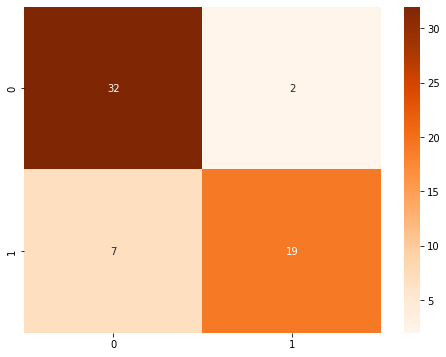

In [ ]:
# for dataset with time feature 
test_predict = clf.predict(x_test)
# confusion_matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
print(metrics.classification_report(y_test, test_predict))

# visiulzation the prediction result with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Oranges')
plt.show()

The confusion matrix result:
 [[29  6]
 [10 15]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        39
           1       0.60      0.71      0.65        21

    accuracy                           0.73        60
   macro avg       0.71      0.73      0.72        60
weighted avg       0.75      0.73      0.74        60



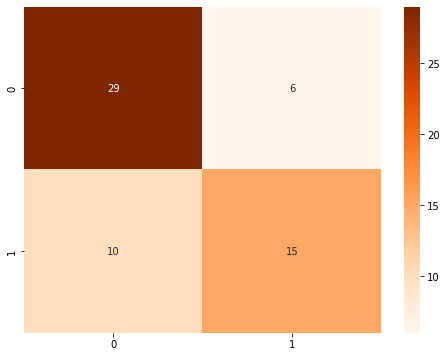

In [ ]:
# for dataset without time feature 
test_predict_not = clf_not.predict(x_test_not)
# confusion_matrix
confusion_matrix_result_not = metrics.confusion_matrix(test_predict_not,y_test)
print('The confusion matrix result:\n',confusion_matrix_result_not)
print(metrics.classification_report(y_test, test_predict_not))

# visiulzation the prediction result with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result_not, annot=True, cmap='Oranges')
plt.show()

check the test performance for LightGBM and baseline models


In [ ]:
# PERFORMANCE for ranfom forests
rfc_predict= rfc.predict(x_test)
# PERFORMANCE for decision trees
tree_pridict = tree.predict(x_test)
# PERFORMANCE for ranfom forests
rfc_predict_not= rfc_not.predict(x_test_not)
# PERFORMANCE for decision trees
tree_pridict_not = tree_not.predict(x_test_not)

print("Dataset with time feature") 
DT_acc, DT_recall, DT_f1 ,DT_rocauc = performance(y_test, tree_pridict, 'Decision Tree')
RF_acc, RF_recall, RF_f1, RF_rocauc = performance(y_test, rfc_predict, 'Random Forest')
LGBM_acc, LGBM_recall, LGBM_f1, LGBM_rocauc = performance(y_test, test_predict, 'LightGBM')  
print("Dataset without time feature") 
DT_acc_not, DT_recall_not, DT_f1_not,DT_rocauc_not = performance(y_test, tree_pridict_not, 'Decision Tree')
RF_acc_not, RF_recall_not, RF_f1_not, RF_rocauc_not = performance(y_test, rfc_predict_not, 'Random Forest')
LGBM_acc_not, LGBM_recall_not, LGBM_f1_not, LGBM_rocauc_not = performance(y_test, test_predict_not, 'LightGBM') 

Dataset with time feature
The accuracy of model Decision Tree is: 73.3%
The F1 Score of model Decision Tree is: 63.6%
The ROC-AUC Score of model Decision Tree is: 71.8%
The Recall Score of model Decision Tree is: 66.7%
The accuracy of model Random Forest is: 81.7%
The F1 Score of model Random Forest is: 74.4%
The ROC-AUC Score of model Random Forest is: 80.4%
The Recall Score of model Random Forest is: 76.2%
The accuracy of model LightGBM is: 85.0%
The F1 Score of model LightGBM is: 80.9%
The ROC-AUC Score of model LightGBM is: 86.3%
The Recall Score of model LightGBM is: 90.5%
Dataset without time feature
The accuracy of model Decision Tree is: 60.0%
The F1 Score of model Decision Tree is: 47.8%
The ROC-AUC Score of model Decision Tree is: 58.2%
The Recall Score of model Decision Tree is: 52.4%
The accuracy of model Random Forest is: 71.7%
The F1 Score of model Random Forest is: 58.5%
The ROC-AUC Score of model Random Forest is: 68.3%
The Recall Score of model Random Forest is: 57.1%


Plot the performance comparisons for LightGBM and baseline models on dataset with time feaure

Text(0.5, 1.0, 'Model Comparison - ROC-AUC Score')

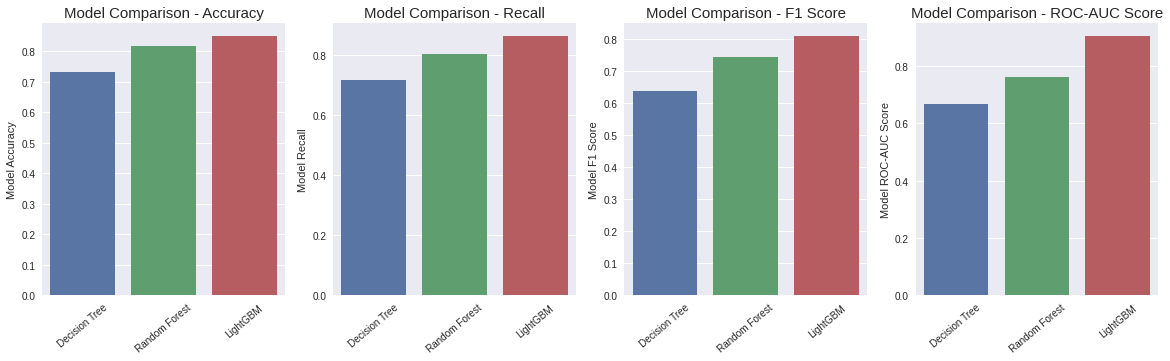

In [ ]:
# plot the model comparsion with time feature
x = ["Decision Tree", 
    "Random Forest",
    "LightGBM"]

y_acc = [DT_acc, RF_acc, LGBM_acc]
y_f1 = [DT_f1, RF_f1, LGBM_f1]
y_recall = [DT_recall, RF_recall, LGBM_recall]
y_rocauc = [DT_rocauc, RF_rocauc, LGBM_rocauc]

plt.style.use("seaborn")
fig, ax = plt.subplots(1,4,figsize=(20,5))
plt.subplot(1, 4, 1)
sns.barplot(x=x,y=y_acc)
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Accuracy", fontsize=15)
plt.subplot(1, 4, 2)
sns.barplot(x=x,y=y_recall)
plt.ylabel("Model Recall")
plt.xticks(rotation=40)
plt.title("Model Comparison - Recall", fontsize=15)
plt.subplot(1, 4, 3)
sns.barplot(x=x,y=y_f1)
plt.ylabel("Model F1 Score")
plt.xticks(rotation=40)
plt.title("Model Comparison - F1 Score", fontsize=15)
plt.subplot(1, 4, 4)
sns.barplot(x=x,y=y_rocauc);
plt.ylabel("Model ROC-AUC Score")
plt.xticks(rotation=40)
plt.title("Model Comparison - ROC-AUC Score", fontsize=15)

Plot the performance comparisons for LightGBM and baseline models on dataset without time feaure

Text(0.5, 1.0, 'Model Comparison - ROC-AUC Score')

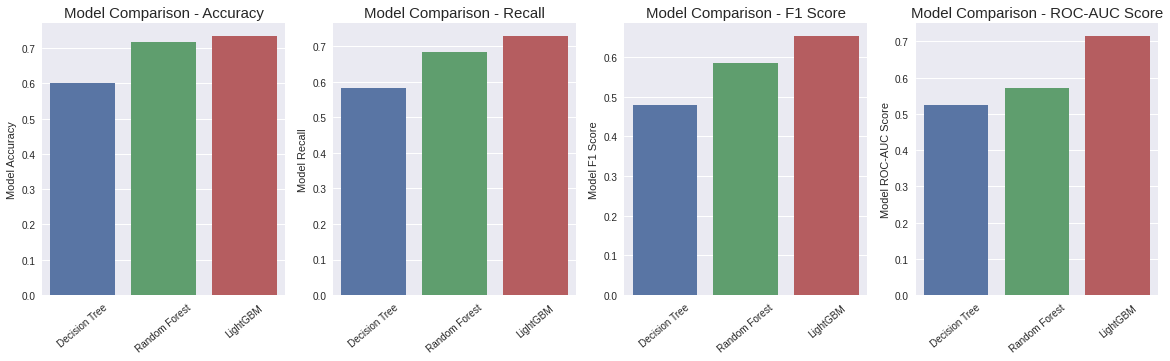

In [ ]:
# plot the model comparsion without time feature
x = ["Decision Tree", 
    "Random Forest",
    "LightGBM"]

y_acc = [DT_acc_not, RF_acc_not, LGBM_acc_not]
y_f1 = [DT_f1_not, RF_f1_not, LGBM_f1_not]
y_recall = [DT_recall_not, RF_recall_not, LGBM_recall_not]
y_rocauc = [DT_rocauc_not, RF_rocauc_not, LGBM_rocauc_not]

plt.style.use("seaborn")
fig, ax = plt.subplots(1,4,figsize=(20,5))
plt.subplot(1, 4, 1)
sns.barplot(x=x,y=y_acc)
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Accuracy", fontsize=15)
plt.subplot(1, 4, 2)
sns.barplot(x=x,y=y_recall)
plt.ylabel("Model Recall")
plt.xticks(rotation=40)
plt.title("Model Comparison - Recall", fontsize=15)
plt.subplot(1, 4, 3)
sns.barplot(x=x,y=y_f1)
plt.ylabel("Model F1 Score")
plt.xticks(rotation=40)
plt.title("Model Comparison - F1 Score", fontsize=15)
plt.subplot(1, 4, 4)
sns.barplot(x=x,y=y_rocauc);
plt.ylabel("Model ROC-AUC Score")
plt.xticks(rotation=40)
plt.title("Model Comparison - ROC-AUC Score", fontsize=15)

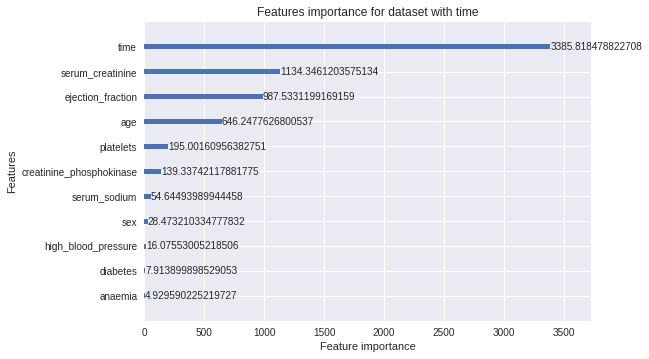

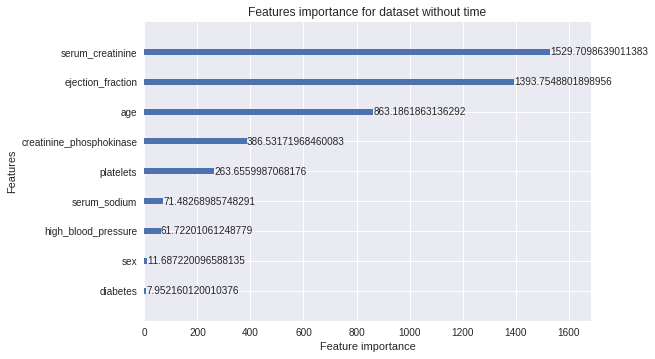

In [ ]:
from lightgbm import plot_importance
ax1=plot_importance(clf,importance_type="gain")
ax1.set_title('Features importance for dataset with time')
ax2=plot_importance(clf_not,importance_type="gain")
ax2.set_title('Features importance for dataset without time')
plt.show()

For the baseline models, the implemented desicion trees and random forests are all better than preious work's version on all of the 4 chosen metrics on the original dataset. After hyperparameter tunning with random search method, from the performance plots can see LightGBM has the performance that beyond baseline models decision tree and random forest for all of the four chosen evaluation metrics for the binary classification task with this heart failure dataset (both for with time feature and without time feature): 
- Accuracy
- Recall
- F1 Score
- ROC-AUC Score 

And with the dataset with time feature, as the same dataset from previous work [1], LightGBM has the best performance on the chosen evaluation metrics compare will all other models other researchers used, as accuracy 85.0%, Recall 90.5%, F1 Score 80.9%, ROC-AUC Score 86.3%. From the visualization of the confusion matrix, although the false positive results is relatively a little more, most of the labels in valid set are classified correctly by LightGBM model. However, after check the feature of importance plot of LightGBM, it shows that the model is overfitted to the time feature, just as the hypothesis made at the EDA part. The feature of importance plot of LightGBM represents the total gain for each used features from the dataset, the more importance the features is since it's represents for number of splits [2]. The plot for model trained from orginal dataset shown that the importance of time feature is almost the sum of all of the rest features, and clearly, the time feature is a disrupt feature that would cause model to overfit itself so that have bad performance when it's applied to the real world.  

For the model on the dataset deleted time feature, LightGBM has the performance as Accuracy 73.3%, Recall 71.4%, F1 Score 65.2%, ROC-AUC Score 72.9%, and this performance is still better than the chosen baseline models on the same dataset for all of the 4 chosen evaluation metrics, and can be found from model performance comparsion plots. From the visualization of the confusion matrix, although the false positive and false negative results are relatively more, espeically false positive results. From the plot of feature importance, the top 3 important features are serum_creatinine, which represents for level of creatinine in the blood, ejection_fraction, as the percentage of blood leaving, and age, which is the age of the patient. These features are all relevant to patient's body situation.

However, having such performance based on the not-that-large dataset, the model is far away to be applied in the real world. First of all, the model performance on the feature engineeringed dataset is not ideal, it's risk to use a 70%+ recall model in the field of heathcare that relative to life and death. Second, all data collected in this dataset are from same area, but different regions and economic conditions are different under certain types of diseases [3], this dataset is far from enough to be applied to train a ML model that can be safty applied to the real world. 

One of the improvement direction for this LightGBM model is to ensemble. The pre-trained transformer architecture nerual networks can be used to encode each data, and then using LightGBM to train the model which using encoded dataset as input (It's a Kaggle trick, the ensemble pipeline of transformer + traditional ML classifier like logistic regression can be very powerful on structural dataset classifiction tasks).   


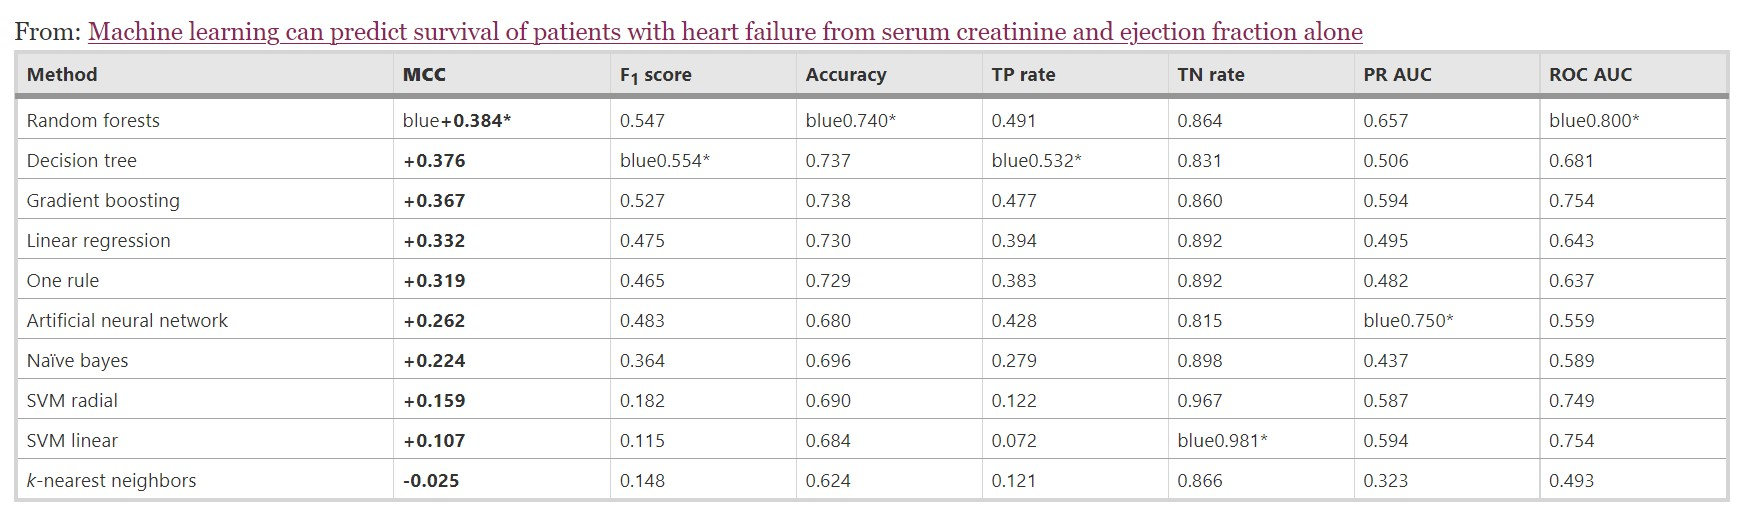

Reference for Experimental Analysis part:

[1] Chicco, Davide, and Giuseppe Jurman. "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone." BMC medical informatics and decision making 20.1 (2020): 1-16.

[2] lightgbm.plot_importance https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html

[3] Marmot, Michael G., Manolis Kogevinas, and Maryann A. Elston. "Social/economic status and disease." Annual review of public health 8.1 (1987): 111-135.

### Ethical considerations (15%)

**Guidelines**: Discuss/analyse the ethical dimensions of the application: bias, fairness, interpretability, etc. Some of these may not be relevant, but we leave this for you to decide which ones would be the relevant ones to consider for the problem at hand. Here you could do a sensitivity/interpretability analysis of the model, to study the effect of different variables or examine whether there are any biases. You could also link this part with your exploratory data analysis, focusing on the ethical dimensions of the dataset rather than the model you built. Justify what your analysis tell us about these ethical dimensions. 


Ethics is an important point that can not be ignored when deploying machine learning in the field of healthcare. At the part of EDA was mentioned that the sample numbers from male and female are different, and this could cause ethical issues in application for real world.. Studies have shown that biases in dataset, such as gender, can be amplified by AI in a variety of situations [1][2], and this would reproduce social stereotypes of minorities on the model, resulting in poor performance of the model, which is particularly dangerous in healthcare [3].

From the dataset collected for this task, although the death case percentage for male and female are similiar, but the samples of male is around twice than samples of female, and this such bias of dataset would cause for the model make the prediction unfair. As currently cannot get more samples for this dataset, sampling method such as oversampling can be applied for minority labels to change to distribution of datasets, and therefore made data become balance during the training process of AI model [4]. Another feature need to considered is time, and it already been test and analysised at experimental analysis part, which should be dropped from this dataset during the training process. And after dropped time feature, from the plot of feature importance, the top 5 features that affect the model the most are:
- serum_creatinine: the level of creatinine in the blood, 
- ejection_fraction: the percentage of blood leaving
- age: the age of the patient. These features are all relevant to patient's body situation.
- creatinine_phosphokinase: the level of the CPK enzyme in the blood
- platelets: platelets in the blood

Also, the two of the most unimportant features are:
- diabetes: if the patient has diabetes
- sex: the gender of patients

It can find that although the dataset exist bias for sex, but the risk that model be affected by this bais has been decreased, since sex feaure is not often been used for built tree-based model. However, it's still important to do a data processing balance such ethical-realted features when trainning and deploying ML models.

Collect more data can be seen as a direct way to improve prediction performance. However, this also exist privacy issues: well-organized medical data is always hard to obtain, not only because the considerable time and expense to be taken but also due to its highly sensitive and tightly regulated usuage [5]. In addition, research indicated that even delete the metadata, such as name and birthday, patients still can be re-identified, so it's still not enough to protect patient's privacy [6]. Technically, training AI models with non-shared input datasets and then merging them as a shared model can be used as a way to protect data privacy [7]. Besides, federal learning, which is a decentralized learning paradigm, can solve data governance and privacy issues through collaborative training algorithms that do not exchange data itself [8]. Future work could consider using these approaches to get more data to train better performance ML model.



Reference for Ethical considerations part:

[1] Zou, James, and Londa Schiebinger. "AI can be sexist and racist—it’s time to make it fair." (2018): 324-326.

[2] Hutson, Matthew. "Even artificial intelligence can acquire biases against race and gender." Science 10 (2017).

[3] Danton S Char, Nigam H Shah, and David Magnus. Implementing machine learning in health care—addressing ethical challenges. The New England journal of medicine, 378(11):981, 2018

[4] Mohammed, Roweida, Jumanah Rawashdeh, and Malak Abdullah. "Machine learning with oversampling and undersampling techniques: overview study and experimental results." 2020 11th international conference on information and communication systems (ICICS). IEEE, 2020.

[5] Rieke, Nicola, et al. "The future of digital health with federated learning." NPJ digital medicine 3.1 (2020): 1-7.

[6] Rocher, Luc, Julien M. Hendrickx, and Yves-Alexandre De Montjoye. "Estimating the success of re-identifications in incomplete datasets using generative models." Nature communications 10.1 (2019): 1-9.

[7] Phong, Le Trieu, et al. "Privacy-preserving deep learning: Revisited and enhanced." International Conference on Applications and Techniques in Information Security. Springer, Singapore, 2017.

[8] Brisimi, Theodora S., et al. "Federated learning of predictive models from federated electronic health records." International journal of medical informatics 112 (2018): 59-67.

<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

### Sustainable development relevance & impact (15%)

**Guidelines**: Discuss what are the current challenges surrounding this dataset in terms of sustainable development and how can ML help overcome them? Additionally, bring out all of the things you have managed to do and understand from the experiments and connect them to sustainable development. Discuss what are the challenges of deploying such a model and how it could impact our progress towards achieving the sustainable development goals. 


<span style='color:red'> **[To be completed by you]** </span>



This dataset is directly associated with SDG 3 (Target 3.4 Reduce mortality from non-communicable diseases and promote mental health) [1], which is about ensure healthy lives and promote well-being for all at all ages. Cardiovascular diseases (CVDs) is the major cause of death globally every year, and an estimate about 32% of all death worldwide is bacause of it in 2019 based on the information from World Health Organization (WHO) [2]. Also, based on WHO's statistics, 85% death cases of CVDs were due to heart attack and stroke. So early detection of cardiovascular disease and timely medical consultation and drug treatment are extremely valuable to avoid the occurrence of severe diseases, especially for cases of heart failure. Therefore, for people with CVDs or one or more risk factors, like hyperlipidaemia, diabetes and hypertension need to be detected and treated early. Report also indicated that more than 75% of CVDs deaths occur in low-income and middle income countries [3], where also shortage for well-trained professional physicans [4]. 

Machine learning, as a power approach to detect and find hidden or non-obvious correlations and relationships between patients, so that can be applied to model survival for heart attack and stroke [5]. Though the collected body information, ML model can make a prediction for patient's heart faliure and make a warning based on its learnt important clinical features that may lead to heart failure [6], so that let people, especially from low meidcal resources area, can be treat and diagnose early to save life.   

In an ideal scenario, researches can get effecient patient's data to built a powerful, accurate model so that can be applied to warn the heart failure risk for patients who have CVDs. However, this is not that realistic since it would cost considerable time to collect and process, and lot of patients don't want to share their data since the risk of priacy leak may let them at high risk of discrimination in areas such as insurance and employment, resulting in the inability to have a normal life [7]. Futhermore, for the situations that the sample collected from different gender are different, it might cause the model generate bias to female when making prediction [8], and which would undermine SDG 5 gender equality, specially 5.6.2, guarantee of equal access to sexual and reproductive health care (Target 5.6: Universal access to reproductive rights and health) [9]

Researchers may also want the model to warn of other diseases. For predicting the increase of diseases, in addition to merging more different kinds of healthcare dataset, and more complex model such as GNN might be required. However, conduct such model and training it could cause very high amount of power consumption for the computational resouces [10], which undermine SDG 7 (Target 7.3: Double the improvement in energy efficiency) [11], ensure access to affordable, reliable, sustainable and modern energy for all. In addition, some expert indicated that dieases is one of the cause of poverty [12]. Take action through machine learning in advance and timely action can make patients spend less money, which enables SDG 1 No Poverty (1.2 Reduce poverty by at least 50%) [13], and subsequently enabling SDG 8 Decent Work and Economic Growth (Target 8.5 Full employment and decent work with equal pay) [14].


Reference for Sustainable development relevance & impact:

[1] Good Health and Well-Being https://sdg-tracker.org/good-health

[2] Cardiovascular diseases (CVDs) https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)#:~:text=Cardiovascular%20diseases%20(CVDs)%20are%20the,%2D%20and%20middle%2Dincome%20countries.

[3] Barquera, Simon, et al. "Global overview of the epidemiology of atherosclerotic cardiovascular disease." Archives of medical research 46.5 (2015): 328-338.

[4] Sabitova, Alina, et al. "Job morale of physicians in low-income and middle-income countries: a systematic literature review of qualitative studies." BMJ open 9.12 (2019): e028657.


[5] Chicco, Davide, and Giuseppe Jurman. "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone." BMC medical informatics and decision making 20.1 (2020): 1-16.

[6] Gallagher J, McCormack D, Zhou S, Ryan F, Watson C, McDonald K, Ledwidge MT. A systematic review of clinical prediction rules for the diagnosis of chronic heart failure. Eur Soc Cardiol (ESC) Heart Fail. 2019; 6(3):499–508.

[7] Meier, Eileen. "Medical privacy and its value for patients." Seminars in oncology nursing. Vol. 18. No. 2. WB Saunders, 2002.


[8] Varoquaux, Gaël, and Veronika Cheplygina. "How I failed machine learning in medical imaging--shortcomings and recommendations." arXiv preprint arXiv:2103.10292 (2021).

[9] Gender equality https://sdg-tracker.org/gender-equality

[10] Strubell, Emma, Ananya Ganesh, and Andrew McCallum. "Energy and policy considerations for modern deep learning research." Proceedings of the AAAI Conference on Artificial Intelligence. Vol. 34. No. 09. 2020.

[11] Affordable and clean energy https://sdg-tracker.org/energy

[12] Bonds, Matthew H., et al. "Poverty trap formed by the ecology of infectious diseases." Proceedings of the Royal Society B: Biological Sciences 277.1685 (2010): 1185-1192.

[13] No poverty https://sdg-tracker.org/no-poverty

[14] Decent Work and Economic Growth https://sdg-tracker.org/economic-growth